# Analyse du voting power

# Calcul de la Moyenne de la concentration du Voting Power pour le Top 1%, Top 5% 10%

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm  # Importer tqdm
from pandas.errors import ParserError, EmptyDataError

directory_path = 'votes_data_karina'  # Chemin vers le dossier contenant les fichiers CSV

# Préparer des listes pour stocker les résultats de concentration pour chaque fichier
top_1_percent_list = []
top_5_percent_list = []
top_10_percent_list = []

files = os.listdir(directory_path)

# Wrap the files list with tqdm to show a progress bar
# Lire chaque fichier CSV et calculer la concentration du voting power
for filename in tqdm(files, desc='Processing files'):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        try:
            df = pd.read_csv(file_path)
            #print(file_path)
        except (ParserError, EmptyDataError) as e:
            #print(f"Erreur lors de la lecture du fichier {filename}: {e}. Fichier ignoré.")
            continue
    
        # Convertir 'voting_power' en numérique, en ignorant les erreurs
        df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
        #print(df['voting_power'])
        # Ignorer les lignes avec 'voting_power' non numérique ou NaN
        df = df.dropna(subset=['voting_power'])
       
        if not df.empty:
            # Calculer la somme du voting power pour le fichier actuel
            # Assumant que df_sorted est déjà défini et contient vos données triées par 'voting_power'
            df_sorted = df.sort_values(by='voting_power', ascending=False)
            n = len(df_sorted)  # Nombre total de votants
            total_voting_power = df_sorted['voting_power'].sum()

            # Calcul des seuils en tant que pourcentage du total
            top_1_percent_voting_power = df_sorted.iloc[:max(1, n//100)]['voting_power'].sum() / total_voting_power
            top_5_percent_voting_power = df_sorted.iloc[:max(1, n*5//100)]['voting_power'].sum() / total_voting_power
            top_10_percent_voting_power = df_sorted.iloc[:max(1, n*10//100)]['voting_power'].sum() / total_voting_power
            
            #print(f"Total Voting Power: {total_voting_power}")
            #print(f"Top 1% Voting Power: {top_1_percent_voting_power:.2%}")
            #print(f"Top 5% Voting Power: {top_5_percent_voting_power:.2%}")
            #print(f"Top 10% Voting Power: {top_10_percent_voting_power:.2%}")
            
            if not np.isnan(top_1_percent_voting_power):
                top_1_percent_list.append(top_1_percent_voting_power)
            if not np.isnan(top_5_percent_voting_power):
                top_5_percent_list.append(top_5_percent_voting_power)
            if not np.isnan(top_10_percent_voting_power):
                top_10_percent_list.append(top_10_percent_voting_power)

# Après la boucle
average_top_1_percent = np.nanmean(top_1_percent_list)  # Utilisez nanmean ici
average_top_5_percent = np.nanmean(top_5_percent_list)
average_top_10_percent = np.nanmean(top_10_percent_list)

# Assurez-vous que les listes ne sont pas vides avant d'imprimer les résultats
if top_1_percent_list:
    print(f"Moyenne de la concentration du Voting Power pour le Top 1% : {average_top_1_percent:.2%}")
else:
    print("Aucune donnée valide pour le Top 1%.")

if top_5_percent_list:
    print(f"Moyenne de la concentration du Voting Power pour le Top 5% : {average_top_5_percent:.2%}")
else:
    print("Aucune donnée valide pour le Top 5%.")

if top_10_percent_list:
    print(f"Moyenne de la concentration du Voting Power pour le Top 10% : {average_top_10_percent:.2%}")
else:
    print("Aucune donnée valide pour le Top 10%.")

/Users/charles/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/charles/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
Processing files:   2%|▍                   | 927/39312 [00:03<01:56, 330.79it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_77723/2011866037.py:42: RuntimeWarning: invalid value encountered in long_scalars
  top_1_percent_voting_power = df_sorted.iloc[:max(1, n//100)]['voting_power'].sum() / total_voting_power
/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_77723/2011866037.py:43: RuntimeWarning: invalid value encountered in long_scalars
  top_5_percent_voting_power = df_sor

Processing files: 100%|██████████████████| 39312/39312 [03:02<00:00, 215.29it/s]

Moyenne de la concentration du Voting Power pour le Top 1% : 51.78%
Moyenne de la concentration du Voting Power pour le Top 5% : 61.20%
Moyenne de la concentration du Voting Power pour le Top 10% : 68.78%


# Calcul de la Moyenne de la concentration du Voting Power de 1% à 100%

In [3]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm  # Import tqdm

directory_path = 'votes_data_karina'  # Path to the directory containing CSV files

# Prepare a DataFrame to store the results of concentration for each percentage
percentages = list(range(1, 101))  # From 1% to 100%
concentration_dict = {f"{percent}": [] for percent in percentages}

files = os.listdir(directory_path)

# Process each CSV file and calculate the voting power concentration
for filename in tqdm(files, desc='Processing files'):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        try:
            df = pd.read_csv(file_path)
        except Exception as e:  # Catching all exceptions to continue with the next file
            continue

        # Convert 'voting_power' to numeric, ignoring errors
        df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
        df = df.dropna(subset=['voting_power'])  # Drop rows with non-numeric or NaN 'voting_power'

        if not df.empty:
            df_sorted = df.sort_values(by='voting_power', ascending=False)
            total_voting_power = df_sorted['voting_power'].sum()
            n = len(df_sorted)  # Total number of voters

            for percent in percentages:
                top_percent_index = max(1, n * percent // 100)
                top_percent_voting_power = df_sorted.iloc[:top_percent_index]['voting_power'].sum() / total_voting_power
                concentration_dict[f"{percent}"].append(top_percent_voting_power)

# Calculating the average for each percentage
average_concentration = {percent: np.nanmean(values) for percent, values in concentration_dict.items()}

# Optionally, convert the dictionary to a DataFrame for better visualization and analysis
average_concentration_df = pd.DataFrame(list(average_concentration.items()), columns=['Percentage', 'Average Concentration'])

# Print or plot your results
print(average_concentration_df)



Processing files:   2%|██▎                                                                                                 | 932/39312 [00:04<02:48, 227.44it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_17375/3955632404.py:34: RuntimeWarning: invalid value encountered in long_scalars
  top_percent_voting_power = df_sorted.iloc[:top_percent_index]['voting_power'].sum() / total_voting_power
Processing files:  14%|██████████████                                                                                     | 5560/39312 [00:30<03:15, 172.84it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_17375/3955632404.py:34: RuntimeWarning: invalid value encountered in long_scalars
  top_percent_voting_power = df_sorted.iloc[:top_percent_index]['voting_power'].sum() / total_voting_power
Processing files:  15%|██████████████▊                                                                                    | 5873/39312 [00:32<02:19, 240.10it/s]/var/folders/qm/zwnr2syd

   Percentage  Average Concentration
0           1               0.517760
1           2               0.545084
2           3               0.569990
3           4               0.592250
4           5               0.611996
..        ...                    ...
95         96               0.971975
96         97               0.972371
97         98               0.972748
98         99               0.973005
99        100               1.000000

[100 rows x 2 columns]


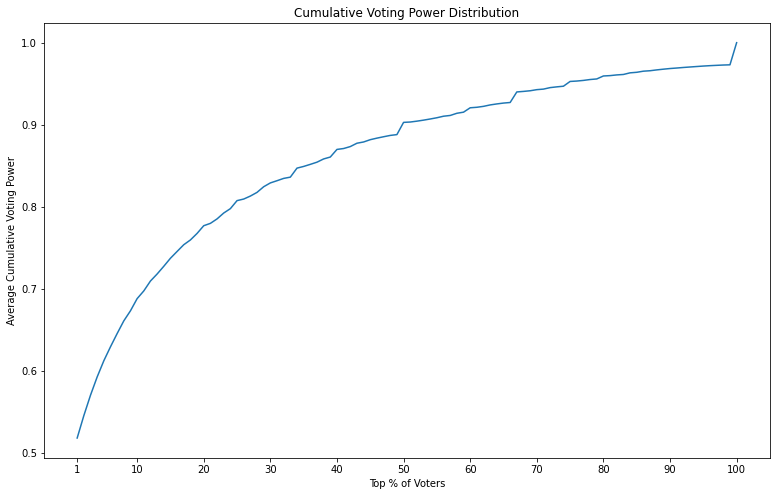

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming average_concentration_df['Percentage'] and average_concentration_df['Average Concentration']
# are already loaded and ready to be plotted.

x_data = np.array(average_concentration_df['Percentage'])
y_data = np.array(average_concentration_df['Average Concentration'])

plt.figure(figsize=(13, 8))  # For example, a 10x6 inch figure
plt.plot(x_data, y_data)
plt.xlabel('Top % of Voters')
plt.xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99])
plt.ylabel('Average Cumulative Voting Power')
# Set the figure size here (width, height) in inches
plt.title('Cumulative Voting Power Distribution')

# Set custom x-axis ticks


plt.show()


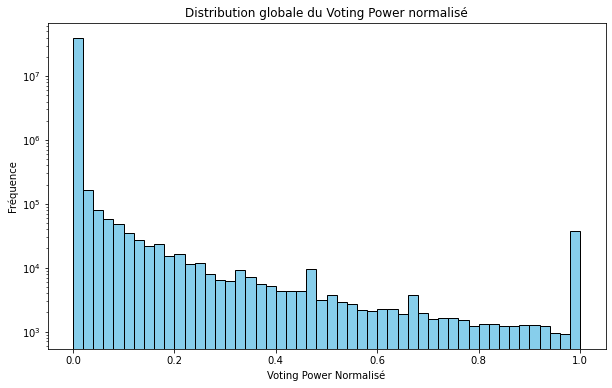

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory_path = 'votes_data_karina'  # Chemin vers le dossier contenant les fichiers CSV

# Liste pour stocker les DataFrames de tous les fichiers après normalisation
all_voting_power_dfs = []

# Lire chaque fichier CSV, normaliser les données et ajouter à la liste
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            continue

        df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
        df = df.dropna(subset=['voting_power'])
        
        if not df.empty:
            # Normalisation du pouvoir de vote
            voting_power_min = df['voting_power'].min()
            voting_power_max = df['voting_power'].max()
            df['voting_power_normalized'] = (df['voting_power'] - voting_power_min) / (voting_power_max - voting_power_min)
            all_voting_power_dfs.append(df[['voting_power_normalized']])

# Concaténer tous les DataFrames normalisés
if all_voting_power_dfs:
    all_voting_power_normalized = pd.concat(all_voting_power_dfs, ignore_index=True)
    plt.figure(figsize=(10, 6))
    plt.hist(all_voting_power_normalized['voting_power_normalized'], bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution globale du Voting Power normalisé')
    plt.xlabel('Voting Power Normalisé')
    plt.ylabel('Fréquence')
    plt.yscale('log')
    plt.show()
else:
    print("Aucune donnée valide trouvée.")


# Coefficient de gini 

In [7]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

def gini_coefficient(voting_powers):
    """
    Calcule le coefficient de Gini à partir d'une liste ou d'un tableau numpy de pouvoirs de vote positifs.
    :param voting_powers: list ou np.array des pouvoirs de vote
    :return: Le coefficient de Gini comme un float
    """
    # Assurer que seules les valeurs positives sont prises en compte
    voting_powers = np.array(voting_powers)
    voting_powers = voting_powers[voting_powers > 0]

    # Vérifier que la liste n'est pas vide
    if len(voting_powers) == 0:
        return None
    
    # Trier les valeurs et calculer le coefficient de Gini
    sorted_vp = np.sort(voting_powers)
    n = len(voting_powers)
    cumsum = np.cumsum(sorted_vp)
    index = np.arange(1, n+1)
    gini = (2 * np.sum(index * sorted_vp)) / (n * np.sum(sorted_vp)) - (n + 1) / n  
    return gini

directory_path = 'votes_data_karina'  # Chemin vers le dossier contenant les fichiers CSV

gini_coefficients = []  # Liste pour stocker les coefficients de Gini de chaque fichier

files = os.listdir(directory_path)

# Process each CSV file and calculate the voting power concentration
for filename in tqdm(files, desc='Processing files'):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        try:
            df = pd.read_csv(file_path)
            # Utiliser 'voting_power_normalized' pour le calcul
            df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
            df = df.dropna(subset=['voting_power'])
            # Aucun besoin de filtrer ou convertir 'voting_power_normalized'
        except (pd.errors.ParserError, pd.errors.EmptyDataError):
            continue
        
        if not df.empty:
            # Normalisation du pouvoir de vote
            voting_power_min = df['voting_power'].min()
            voting_power_max = df['voting_power'].max()
            df['voting_power_normalized'] = (df['voting_power'] - voting_power_min) / (voting_power_max - voting_power_min)
            
            gini_coefficient_value = gini_coefficient(df['voting_power_normalized'].values)
            if gini_coefficient_value is not None:
                gini_coefficients.append(gini_coefficient_value)
                #print(f"Coefficient de Gini pour {filename}: {gini_coefficient_value:.4f}")

# Calculer et afficher le coefficient de Gini moyen si la liste n'est pas vide
if gini_coefficients:
    gini_stats = pd.Series(gini_coefficients).describe()
    gini_stats['sum'] = np.sum(gini_coefficients)
    gini_stats['var'] = np.var(gini_coefficients)
    
    print("Descriptive Statistics of Gini Coefficients:")
    print(gini_stats)
    
    # Save the descriptive statistics to a CSV file
    gini_stats.to_csv('/Users/charles/Documents/Articles/2024/DAO/FINAL_FILES_KARINA/gini_descriptive_stats.csv', header=True)
    
    print("Descriptive statistics saved to gini_descriptive_stats.csv.")
else:
    print("Aucune donnée valide pour calculer le coefficient de Gini.")

Processing files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 39312/39312 [01:41<00:00, 388.07it/s]

Descriptive Statistics of Gini Coefficients:
count    30849.000000
mean         0.692404
std          0.274703
min          0.000000
25%          0.556868
50%          0.772326
75%          0.908402
max          0.999752
sum      21359.972785
var          0.075459
dtype: float64
Descriptive statistics saved to gini_descriptive_stats.csv.


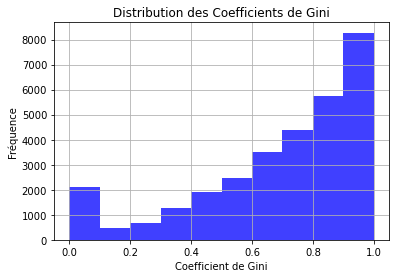

In [8]:
import matplotlib.pyplot as plt

plt.hist(gini_coefficients, bins=10, alpha=0.75, color='blue')
plt.title('Distribution des Coefficients de Gini')
plt.xlabel('Coefficient de Gini')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


In [64]:
import os
import pandas as pd
import numpy as np

directory_path = 'votes_data_karina'  # Chemin vers le dossier contenant les fichiers CSV

# Liste pour stocker les valeurs normalisées du pouvoir de vote
normalized_voting_power_values = []

# Lire chaque fichier CSV, normaliser les données et ajouter à la liste
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            continue

        df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
        df = df.dropna(subset=['voting_power'])

        if not df.empty:
            # Normalisation du pouvoir de vote
            voting_power_min = df['voting_power'].min()
            voting_power_max = df['voting_power'].max()
            df['voting_power_normalized'] = (df['voting_power'] - voting_power_min) / (voting_power_max - voting_power_min)
            # Ajouter les valeurs normalisées à la liste
            normalized_voting_power_values.extend(df['voting_power_normalized'].dropna().tolist())

# Calculer l'histogramme des valeurs normalisées en spécifiant une plage de valeurs
hist, bins = np.histogram(normalized_voting_power_values, bins=50, range=(0, 1))

# Afficher les valeurs de l'histogramme
print("Histogram Values:")
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")


Histogram Values:
Bin 1: 3576704
Bin 2: 57957
Bin 3: 23126
Bin 4: 19053
Bin 5: 14001
Bin 6: 9881
Bin 7: 6185
Bin 8: 6394
Bin 9: 6646
Bin 10: 4076
Bin 11: 3511
Bin 12: 2742
Bin 13: 2864
Bin 14: 2351
Bin 15: 1796
Bin 16: 1867
Bin 17: 2452
Bin 18: 1235
Bin 19: 1705
Bin 20: 1351
Bin 21: 1093
Bin 22: 996
Bin 23: 1630
Bin 24: 7459
Bin 25: 829
Bin 26: 1182
Bin 27: 745
Bin 28: 915
Bin 29: 616
Bin 30: 542
Bin 31: 771
Bin 32: 889
Bin 33: 503
Bin 34: 2512
Bin 35: 797
Bin 36: 443
Bin 37: 586
Bin 38: 439
Bin 39: 568
Bin 40: 283
Bin 41: 519
Bin 42: 299
Bin 43: 509
Bin 44: 360
Bin 45: 324
Bin 46: 533
Bin 47: 540
Bin 48: 268
Bin 49: 313
Bin 50: 10890


High Concentration in the First Bin: The first bin has an exceptionally high count of 3,576,704, indicating a significant concentration of voting power values at the lower end of the normalized scale. This suggests that a vast majority of the entities (individuals, groups, or units depending on the context) have a voting power that is very close to the minimum observed in your dataset.
Rapid Decrease in Frequency: Following the first bin, there's a rapid decrease in the frequency of values in subsequent bins. For instance, the second bin has 57,957 counts, and this number continues to decrease as we move to higher bins. This indicates that as voting power increases, fewer entities have those higher values of voting power.
Sparse Distribution in Higher Bins: Beyond the initial bins, the counts in each bin become relatively low and fluctuate. This fluctuation could indicate variability in the distribution of voting power among entities with higher than minimum voting power but still reflects a general trend of decreasing frequency with increasing voting power.
Notable Exceptions: Certain bins exhibit a noticeable increase in counts compared to their immediate neighbors (for example, bin 24 with 7,459 and bin 50 with 10,890 counts). These spikes might indicate clusters of voting power values that deviate from the overall decreasing trend. These could be points of interest for further investigation as they suggest groups of entities with similar, yet distinctively higher, voting power.
Overall Distribution: The overall distribution suggests that the voting power is heavily skewed towards the lower end, with a long tail extending towards the higher end of the normalized scale. This is characteristic of many real-world distributions where a large number of observations are concentrated in a small range, and only a few observations are spread out over a larger range.
Scientific Implications:

Inequality in Voting Power: The distribution suggests a significant inequality in voting power among the entities, with a vast majority having minimal power and a small fraction having significantly higher power.
Potential for Outliers: The spikes in certain bins suggest the presence of outliers or specific groups with unusually high voting power, which could be of interest for understanding the dynamics of power distribution within the dataset.
Need for Further Analysis: The distribution invites further analysis to understand the factors contributing to this skewed distribution of voting power. This could include investigating the characteristics of entities with low vs. high voting power or examining the reasons behind the clustering of values in certain bins.
In conclusion, your histogram reveals a skewed distribution of normalized voting power, emphasizing the concentration of lower values and the presence of outliers or significant variances at higher values. This analysis can provide foundational insights for understanding the dynamics of voting power distribution and guiding further investigative efforts.

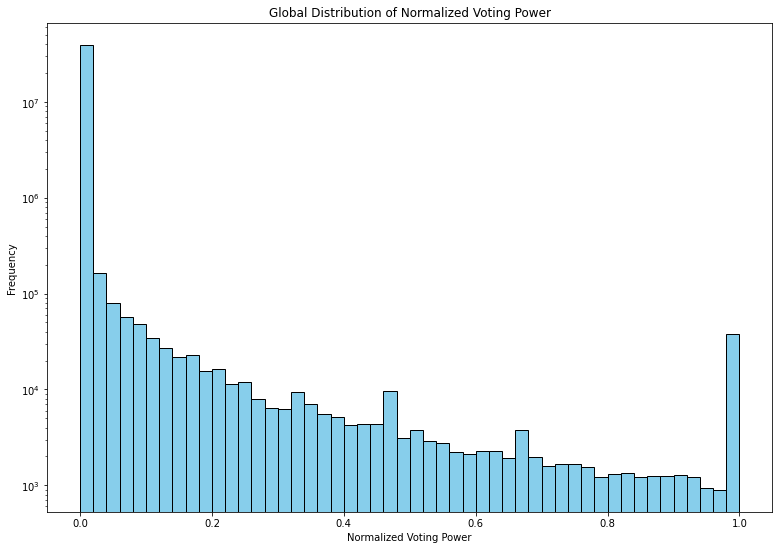

In [9]:
# Concaténer tous les DataFrames normalisés
if all_voting_power_dfs:
    all_voting_power_normalized = pd.concat(all_voting_power_dfs, ignore_index=True)

    # Afficher la distribution globale du Voting Power normalisé
    plt.figure(figsize=(13, 9))
    plt.hist(all_voting_power_normalized['voting_power_normalized'], bins=50, color='skyblue', edgecolor='black')
    plt.title('Global Distribution of Normalized Voting Power')
    plt.xlabel('Normalized Voting Power')
    plt.ylabel('Frequency')
    plt.yscale('log')  # Use a logarithmic scale for the y-axis
    plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Assuming all_voting_power_normalized is your DataFrame
data = all_voting_power_normalized['voting_power_normalized']

# Calculate histogram data
counts, bin_edges = np.histogram(data, bins=50)
bin_labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color='skyblue', edgecolor='black')
plt.title('Global Distribution of Normalized Voting Power')
plt.xlabel('Normalized Voting Power')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a logarithmic scale for the y-axis

# Creating the table to display bin ranges and their counts
# Note: Adjust table position and size (bbox) as needed
cell_text = [counts]
columns = bin_labels

# Adding a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=['Counts'],
                      colLabels=columns,
                      cellLoc='center',
                      rowLoc='center',
                      loc='bottom',
                      bbox=[0, -0.5, 1, 0.3])

plt.subplots_adjust(left=0.2, bottom=0.2)  # Adjust layout to make room for the table
plt.show()


ValueError: autodetected range of [nan, nan] is not finite

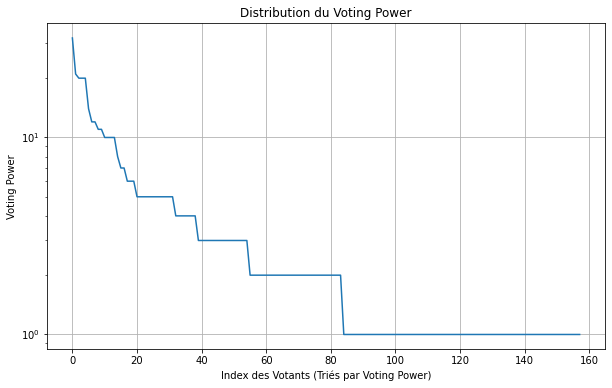

In [11]:
import matplotlib.pyplot as plt

# Supposons que df_sorted est déjà défini et contient vos données triées
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['voting_power'].reset_index(drop=True))
plt.title('Distribution du Voting Power')
plt.xlabel('Index des Votants (Triés par Voting Power)')
plt.ylabel('Voting Power')
plt.yscale('log')  # Utiliser une échelle logarithmique si la distribution est très étalée
plt.grid(True)
plt.show()


# This one is important - calculate the avg gini by dao

In [13]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

def gini_coefficient(voting_powers):
    if len(voting_powers) == 0:
        return None
    sorted_vp = np.sort(np.array(voting_powers))
    n = len(voting_powers)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * sorted_vp)) / (n * np.sum(sorted_vp))

# Lire le fichier des URLs des propositions
proposal_urls_df = pd.read_csv('/Users/charles/Documents/Articles/2024/DAO/FINAL_FILES_KARINA/all_unique_proposalsF.csv')
directory_path = 'votes_data_karina'

dao_gini_means = {}

# Parcourir chaque DAO unique
for dao_url in tqdm(proposal_urls_df['DAO URL'].unique(), desc='Processing Proposals'):
    dao_proposals = proposal_urls_df[proposal_urls_df['DAO URL'] == dao_url]
    gini_values = []

    # Parcourir chaque proposition du DAO
    for _, proposal in dao_proposals.iterrows():
        proposal_url = proposal['Proposal URL']
        proposal_id = proposal_url.split('/')[-1]
        file_path = os.path.join(directory_path, f"{proposal_id}.csv")
        
        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            votes_df = pd.read_csv(file_path, on_bad_lines='skip')
            if not votes_df.empty and 'voting_power' in votes_df:
                votes_df['voting_power'] = pd.to_numeric(votes_df['voting_power'], errors='coerce')
                gini_coeff = gini_coefficient(votes_df['voting_power'].dropna())
                
                if gini_coeff is not None:
                    gini_values.append(gini_coeff)

    if gini_values:
        dao_gini_means[dao_url] = np.mean(gini_values)

# Préparation du DataFrame final
results_list = [{'DAO URL': dao_url, 'Average Gini Coefficient': gini} for dao_url, gini in dao_gini_means.items()]
results_df = pd.DataFrame(results_list)

# Sauvegarde du DataFrame
results_df.to_csv('/Users/charles/Documents/Articles/2024/DAO/dao_gini_mean_final.csv', index=False)

print("Le coefficient de Gini moyen pour chaque DAO a été sauvegardé")


Processing Proposals:   4%|███▊                                                                                               | 48/1249 [00:01<00:34, 34.91it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_17375/2667195414.py:13: RuntimeWarning: invalid value encountered in long_scalars
  return (np.sum((2 * index - n - 1) * sorted_vp)) / (n * np.sum(sorted_vp))
Processing Proposals:  14%|█████████████▊                                                                                    | 176/1249 [00:04<00:27, 38.58it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_17375/2667195414.py:13: RuntimeWarning: invalid value encountered in long_scalars
  return (np.sum((2 * index - n - 1) * sorted_vp)) / (n * np.sum(sorted_vp))
Processing Proposals:  33%|████████████████████████████████▎                                                                 | 412/1249 [00:13<00:42, 19.51it/s]/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_17375/2667195414.py:13: R

Le coefficient de Gini moyen pour chaque DAO a été sauvegardé


In [2]:
import pandas as pd

# Load the two CSV files
dao_gini_mean = pd.read_csv('/Users/charles/Documents/Articles/2024/DAO/dao_gini_mean_final.csv', sep=",")
dao_prediction = pd.read_csv('/Users/charles/Documents/Articles/2024/DAO/DAO_Categories_and_Proposal_Counts_Final.csv', delimiter=',')

# Merge the two dataframes on the DAO URL
merged_df = pd.merge(dao_gini_mean, dao_prediction, on='DAO URL')

# Compute the average Gini coefficient and standard deviation by Predicted Category
gini_stats_by_category = merged_df.groupby('Predicted_Category')['Average Gini Coefficient'].agg(['mean', 'std']).reset_index()

# Rename the columns for clarity
gini_stats_by_category.columns = ['Predicted_Category', 'Average Gini Coefficient', 'Standard Deviation']

# Save the result to a new CSV file
gini_stats_by_category.to_csv('gini_stats_by_category_final.csv', index=False)

print("Average Gini coefficient and standard deviation by DAO category:")
print(gini_stats_by_category)

Average Gini coefficient and standard deviation by DAO category:
           Predicted_Category  Average Gini Coefficient  Standard Deviation
0                    Activism                  0.484930            0.280018
1               Art & Culture                  0.435581            0.308864
2   Blockchain Infrastructure                  0.593366            0.308004
3                Crowdfunding                  0.606756            0.272742
4                    DAO Tool                  0.501779            0.289553
5                        Data                  0.466391            0.268925
6                        DeFi                  0.479507            0.352698
7                      Gaming                  0.493477            0.291095
8                 Investments                  0.511199            0.303024
9                       Media                  0.533128            0.258399
10                       NFTs                  0.405602            0.269289
11            Physical 

In [19]:
# Merge the two dataframes on the DAO URL
merged_df = pd.merge(dao_gini_mean, dao_prediction, on='DAO URL')

# Compute the average Gini coefficient by Predicted Category
average_gini_by_category = merged_df.groupby('Predicted_Category')['Average Gini Coefficient'].mean().reset_index()

# Print the result in a format suitable for copying to Excel
print("Predicted_Category,Average Gini Coefficient")
for index, row in average_gini_by_category.iterrows():
    print(f"{row['Predicted_Category']},{row['Average Gini Coefficient']}")

Predicted_Category,Average Gini Coefficient
Activism,0.4836800626324385
Art & Culture,0.4355811526594408
Blockchain Infrastructure,0.5930088068981743
Crowdfunding,0.6113607516399665
DAO Tool,0.5006757886859635
Data,0.4663910827774112
DeFi,0.4800462325772721
Gaming,0.4945246662571725
Investments,0.5111993965385626
Media,0.5331282747203844
NFTs,0.40271715840221634
Physical Assets,0.32943439965468985
Science,0.1022062582993162


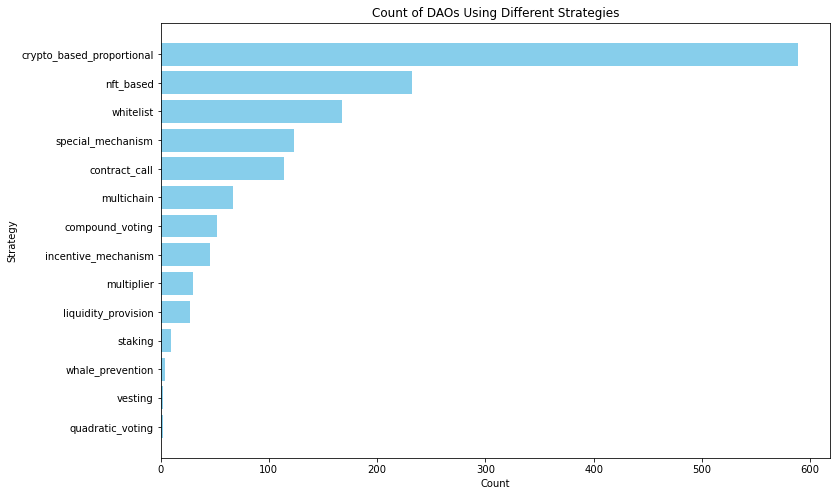

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the image
data = {
    'Strategy': [
        'crypto_based_proportional', 'whale_prevention', 'multichain', 'whitelist',
        'incentive_mechanism', 'compound_voting', 'special_mechanism',
        'contract_call', 'staking', 'vesting', 'liquidity_provision', 'nft_based',
        'multiplier', 'quadratic_voting'
    ],
    'Count': [
        589, 4, 67, 168, 46, 52, 123, 114, 10, 2, 27, 232, 30, 2
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by 'Count' in descending order
df_sorted = df.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Strategy'], df_sorted['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Strategy')
plt.title('Count of DAOs Using Different Strategies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

In [30]:
import scipy.stats as stats
import pandas as pd
import scikit_posthocs as sp

# Chargement des données
metadata_path = "/Users/charles/Documents/Articles/2024/DAO/Article_Files/DAO_Governance_data.csv"
df = pd.read_csv(metadata_path, sep='\t')

# Création des groupes
df['Lifespan_Group'] = pd.qcut(df['Lifespan (Days)'], q=3, labels=["court", "moyen", "long"])
df['Member_Group'] = pd.qcut(df['Member Count'], q=3, labels=["faible", "moyen", "élevé"])

# Statistiques descriptives
def print_stats_by_group(df, group_col, metric):
    grouped = df.groupby(group_col)[metric].agg(['mean', 'std', 'count'])
    print(f"\nAnalyse pour '{metric}' segmenté par '{group_col}':\n")
    print(grouped.round(4))

print_stats_by_group(df, 'Lifespan_Group', 'Average Gini Coefficient')
print_stats_by_group(df, 'Member_Group', 'Average Gini Coefficient')

# Test Kruskal-Wallis et post-hoc Dunn
def kruskal_dunn(df, group_col, metric):
    df_clean = df[[group_col, metric]].dropna().reset_index(drop=True)
    print(f"\nTest de Kruskal-Wallis sur '{metric}' par '{group_col}' :")
    groups = [group[metric] for name, group in df_clean.groupby(group_col)]
    stat, p = stats.kruskal(*groups)
    print(f"Statistique H = {stat:.4f}, p-value = {p:.4g}")
    
    if p < 0.05:
        print("\nTest post-hoc de Dunn (correction Bonferroni) :")
        posthoc = sp.posthoc_dunn(df_clean, val_col=metric, group_col=group_col, p_adjust='bonferroni')
        print(posthoc.round(4))
    else:
        print("Pas de différence significative entre les groupes, test post-hoc non effectué.")

kruskal_dunn(df, 'Lifespan_Group', 'Average Gini Coefficient')
kruskal_dunn(df, 'Member_Group', 'Average Gini Coefficient')


Analyse pour 'Average Gini Coefficient' segmenté par 'Lifespan_Group':

                  mean     std  count
Lifespan_Group                       
court           0.3021  0.3317    408
moyen           0.5726  0.2636    409
long            0.6036  0.2643    405

Analyse pour 'Average Gini Coefficient' segmenté par 'Member_Group':

                mean     std  count
Member_Group                       
faible        0.2265  0.2640    401
moyen         0.5997  0.2321    409
élevé         0.6452  0.2756    412

Test de Kruskal-Wallis sur 'Average Gini Coefficient' par 'Lifespan_Group' :
Statistique H = 196.0283, p-value = 2.71e-43

Test post-hoc de Dunn (correction Bonferroni) :
       court   moyen    long
court    1.0  0.0000  0.0000
moyen    0.0  1.0000  0.2794
long     0.0  0.2794  1.0000

Test de Kruskal-Wallis sur 'Average Gini Coefficient' par 'Member_Group' :
Statistique H = 408.9997, p-value = 1.538e-89

Test post-hoc de Dunn (correction Bonferroni) :
        faible   moyen   él

/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_77723/751729816.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(group_col)[metric].agg(['mean', 'std', 'count'])
/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_77723/751729816.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(group_col)[metric].agg(['mean', 'std', 'count'])
/var/folders/qm/zwnr2syd4v73yzm6yspkkp4m0000gn/T/ipykernel_77723/751729816.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Chargement des données
df = pd.read_csv("/Users/charles/Documents/Articles/2024/DAO/Article_Files/DAO_Governance_data.csv", sep='\t')

# Nettoyage : retirer les lignes avec valeurs manquantes sur les variables pertinentes
cols_to_use = ['Average Gini Coefficient', 'Lifespan (Days)', 'Member Count', 'Proposal Count', 'Predicted_Category']
df = df[cols_to_use].dropna()

# Transformation log des variables numériques pour réduire la skewness
df['log_lifespan'] = np.log1p(df['Lifespan (Days)'])
df['log_members'] = np.log1p(df['Member Count'])
df['log_proposals'] = np.log1p(df['Proposal Count'])

# Régression avec variable catégorielle
model = smf.ols("Q('Average Gini Coefficient') ~ log_lifespan + log_members + log_proposals + C(Predicted_Category)", data=df).fit()

# Résumé
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q('Average Gini Coefficient')   R-squared:                       0.423
Model:                                       OLS   Adj. R-squared:                  0.416
Method:                            Least Squares   F-statistic:                     58.88
Date:                           Thu, 05 Jun 2025   Prob (F-statistic):          3.13e-132
Time:                                   11:08:16   Log-Likelihood:                0.90860
No. Observations:                           1222   AIC:                             30.18
Df Residuals:                               1206   BIC:                             111.9
Df Model:                                     15                                         
Covariance Type:                       nonrobust                                         
                                                         coef    std err          t      P>|t|      

In [22]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Charger les données
metadata_path = "/Users/charles/Documents/Articles/2024/DAO/Article_Files/DAO_Governance_data.csv"
df = pd.read_csv(metadata_path, sep='\t')

# Nettoyage éventuel
df = df.dropna(subset=['Average Gini Coefficient', 'Predicted_Category', 'Lifespan (Days)', 'Member Count', 'Proposal Count'])

# Transformation log
df['log_lifespan'] = np.log(df['Lifespan (Days)'] + 1)
df['log_members'] = np.log(df['Member Count'] + 1)
df['log_proposals'] = np.log(df['Proposal Count'] + 1)

# Spécification du modèle
formula = "Q('Average Gini Coefficient') ~ C(Predicted_Category) + log_lifespan + log_members + log_proposals"

# Liste des quantiles à estimer
quantiles = [0.25, 0.5, 0.75]

# Estimations pour chaque quantile
results = {}
for q in quantiles:
    mod = smf.quantreg(formula, df)
    res = mod.fit(q=q)
    results[q] = res
    print(f"\nRégression quantile pour τ = {q}")
    print(res.summary())


Régression quantile pour τ = 0.25
                               QuantReg Regression Results                               
Dep. Variable:     Q('Average Gini Coefficient')   Pseudo R-squared:               0.3076
Model:                                  QuantReg   Bandwidth:                     0.09097
Method:                            Least Squares   Sparsity:                       0.7526
Date:                           Thu, 05 Jun 2025   No. Observations:                 1222
Time:                                   11:12:04   Df Residuals:                     1206
                                                   Df Model:                           15
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -0.1930      0.054     -3.581      0.000   

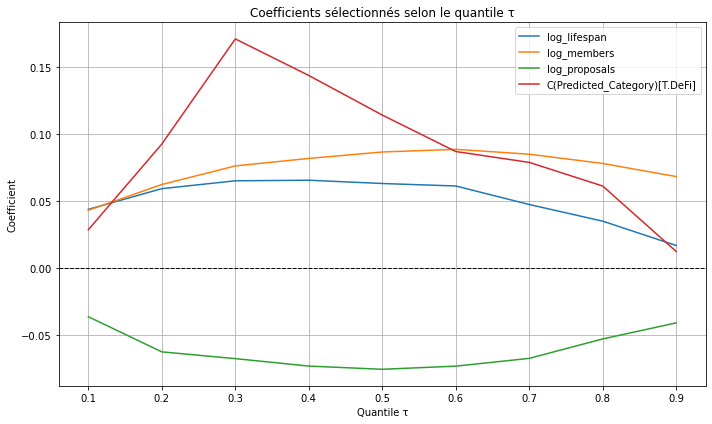

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Chargement des données
# Remplacez ceci par le chemin vers votre propre fichier
# Charger les données
# Charger les données
metadata_path = "/Users/charles/Documents/Articles/2024/DAO/Article_Files/DAO_Governance_data.csv"
df = pd.read_csv(metadata_path, sep='\t')

# Nettoyage éventuel
df = df.dropna(subset=['Average Gini Coefficient', 'Predicted_Category', 'Lifespan (Days)', 'Member Count', 'Proposal Count'])

# Transformation log
df['log_lifespan'] = np.log(df['Lifespan (Days)'] + 1)
df['log_members'] = np.log(df['Member Count'] + 1)
df['log_proposals'] = np.log(df['Proposal Count'] + 1)

# S'assurer que la variable catégorielle est bien traitée
df['Predicted_Category'] = df['Predicted_Category'].astype('category')

# Formule (adaptée au nom exact des colonnes de votre dataset)
formula = "Q('Average Gini Coefficient') ~ C(Predicted_Category) + log_lifespan + log_members + log_proposals"
quantiles = np.arange(0.1, 0.91, 0.1)
coefs = {}

for q in quantiles:
    model = smf.quantreg(formula, df)
    res = model.fit(q=q)
    coefs[q] = res.params.to_numpy()
    if q == quantiles[0]:
        coef_names = res.params.index

coefs_df = pd.DataFrame(coefs, index=coef_names).T

# Colonnes sélectionnées
selected_vars = ['log_lifespan', 'log_members', 'log_proposals', 'C(Predicted_Category)[T.DeFi]']

plt.figure(figsize=(10, 6))
for col in selected_vars:
    if col in coefs_df.columns:
        plt.plot(coefs_df.index.to_numpy(), coefs_df[col].to_numpy(), label=col)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Quantile τ')
plt.ylabel('Coefficient')
plt.title('Coefficients sélectionnés selon le quantile τ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import entropy, pearsonr

def gini_coefficient(v):
    v = np.array(v)
    v = v[v > 0]
    if len(v) == 0:
        return None
    v_sorted = np.sort(v)
    n = len(v)
    cumvals = np.cumsum(v_sorted)
    gini = (2 * np.sum((np.arange(1, n+1)) * v_sorted)) / (n * cumvals[-1]) - (n + 1) / n
    return gini

def shannon_entropy(v):
    v = np.array(v)
    v = v[v > 0]
    if len(v) == 0:
        return None
    p = v / v.sum()
    return entropy(p)

def theil_index(v):
    v = np.array(v)
    v = v[v > 0]
    if len(v) == 0:
        return None
    mean = v.mean()
    if mean == 0:
        return None
    ratios = v / mean
    return np.mean(ratios * np.log(ratios))

def top_ratio(v, frac):
    v = np.array(v)
    v = v[v > 0]
    if len(v) == 0:
        return None
    v_sorted = np.sort(v)[::-1]
    k = max(1, int(np.ceil(len(v_sorted) * frac)))
    return v_sorted[:k].sum() / v_sorted.sum()

directory_path = 'votes_data_karina'
metrics = []

for filename in tqdm(os.listdir(directory_path), desc='Processing files for disparity metrics'):
    if not filename.endswith('.csv'):
        continue
    file_path = os.path.join(directory_path, filename)
    try:
        df = pd.read_csv(file_path)
    except (pd.errors.ParserError, pd.errors.EmptyDataError):
        continue
    df['voting_power'] = pd.to_numeric(df['voting_power'], errors='coerce')
    df = df.dropna(subset=['voting_power'])
    if df.empty:
        continue
    vp = df['voting_power'].values
    vp_norm = (vp - vp.min()) / (vp.max() - vp.min())
    metrics.append({
        'file': filename,
        'gini': gini_coefficient(vp_norm),
        'entropy': shannon_entropy(vp_norm),
        'theil': theil_index(vp_norm),
        'top1': top_ratio(vp_norm, 0.01),
        'top10': top_ratio(vp_norm, 0.10),
        'top50': top_ratio(vp_norm, 0.50)
    })

metrics_df = pd.DataFrame(metrics).dropna()
metrics_df.to_csv('voting_power_disparity_metrics.csv', index=False)

corrs = []
for metric in ['entropy', 'theil', 'top1', 'top10', 'top50']:
    r, p = pearsonr(metrics_df['gini'], metrics_df[metric])
    corrs.append({'Metric': metric, 'Pearson_r': r, 'p_value': p})
corr_df = pd.DataFrame(corrs).set_index('Metric')
print(corr_df)
corr_df.to_csv('gini_correlations.csv')

corr_matrix = metrics_df[['gini','entropy','theil','top1','top10','top50']].corr()
corr_matrix.to_csv('metrics_corr_matrix.csv')
corr_matrix


The table above shows the Pearson correlations between the Gini coefficient and alternative concentration indicators computed from all proposal vote files. Very high and significant correlations (p < 0.05) indicate that regardless of the disparity measure—Shannon entropy, Theil index, or top share ratios—the results are consistent. For the rest of the analysis we therefore retain the Gini coefficient as a representative indicator.